In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (AnnotationBbox, OffsetImage,TextArea)
from matplotlib.cbook import get_sample_data

# Line to unpack .xvg generated by GROMACS
t_e, ene = np.loadtxt("./energy.xvg",comments=["@","#"],unpack=True)

In [2]:
# "Accumulated" Mean
n_data = len(ene)
ene_mean = np.zeros(n_data)

for i in range(n_data):
    ene_mean[i] = np.mean(ene[0:i+1])

print(n_data)

501


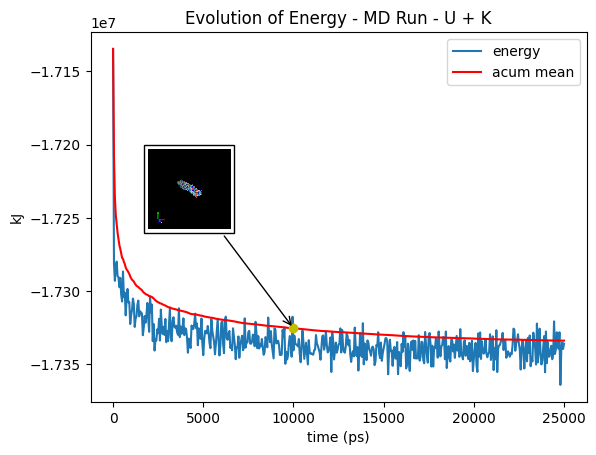

In [6]:
fig, ax = plt.subplots()
#plt.figure(dpi=200)
plt.plot(t_e, ene, label="energy")
plt.plot(t_e, ene_mean, label="acum mean", color="r")
#plt.scatter(t_e, ene, label="points", color="r", alpha=0.5, )

# Get the point at 10 ns = 10000 ps
mask = (t_e == 10000)
selected = ene_mean[mask]
plt.scatter([10000], selected, color="y", zorder=3)

# Add a marker of the selected point -  An image
arr_img = plt.imread("fib.jpg")
im = OffsetImage(arr_img, zoom=0.07)
im.image.axes = ax

xy = [10000, selected[:]]
ab = AnnotationBbox(im, xy,
                    xybox=(-75., 100.),
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0.3,
                    arrowprops=dict(arrowstyle="->"))

ax.add_artist(ab)

plt.xlabel("time (ps)")
plt.ylabel("kJ")
plt.title("Evolution of Energy - MD Run - U + K")
plt.legend()
plt.show()